In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import pathlib
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-03-18 20:27:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.6MB/s    in 22s     

2023-03-18 20:28:21 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               seed=42, 
                                               target_size=(224, 224),
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               seed=42, 
                                               target_size=(224, 224),
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [7]:
cnn_model1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])

cnn_model1.compile(loss = tf.keras.losses.categorical_crossentropy,
                   optimizer = Adam(),
                   metrics=["accuracy"])

In [8]:
history1 = cnn_model1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 62s 216ms/step - loss: 2.2414 - accuracy: 0.1644 - val_loss: 2.1660 - val_accuracy: 0.1932
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 2.0138 - accuracy: 0.2924 - val_loss: 1.9461 - val_accuracy: 0.3128
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 1.6150 - accuracy: 0.4544 - val_loss: 1.9901 - val_accuracy: 0.3300
Epoch 4/5
235/235 [==============================] - 50s 211ms/step - loss: 0.9336 - accuracy: 0.6951 - val_loss: 2.6296 - val_accuracy: 0.2684
Epoch 5/5
235/235 [==============================] - 49s 207ms/step - loss: 0.3356 - accuracy: 0.8951 - val_loss: 3.9948 - val_accuracy: 0.2600


<Axes: >

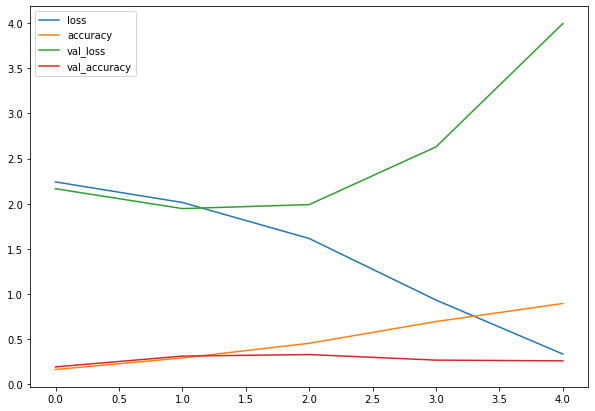

In [9]:
pd.DataFrame(history1.history).plot(figsize=(10, 7))

In [10]:
cnn_model2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])

cnn_model2.compile(loss=tf.keras.losses.categorical_crossentropy,
                   optimizer = Adam(),
                   metrics=["accuracy"])

history2 = cnn_model2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 238ms/step - loss: 2.1326 - accuracy: 0.2384 - val_loss: 2.0320 - val_accuracy: 0.2672
Epoch 2/5
235/235 [==============================] - 48s 203ms/step - loss: 1.7497 - accuracy: 0.4085 - val_loss: 1.8826 - val_accuracy: 0.3432
Epoch 3/5
235/235 [==============================] - 55s 236ms/step - loss: 1.3534 - accuracy: 0.5547 - val_loss: 1.9496 - val_accuracy: 0.3336
Epoch 4/5
235/235 [==============================] - 47s 200ms/step - loss: 0.8680 - accuracy: 0.7357 - val_loss: 2.1941 - val_accuracy: 0.3200
Epoch 5/5
235/235 [==============================] - 47s 199ms/step - loss: 0.4566 - accuracy: 0.8717 - val_loss: 2.7454 - val_accuracy: 0.2972


In [11]:
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range=5,
                                             width_shift_range=0.1, 
                                             height_shift_range=0.1,
                                             shear_range=0.1, 
                                             zoom_range=0.1)

In [13]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  seed=42,
                                                                  batch_size = 32,
                                                                  class_mode="categorical",
                                                                  target_size=(224,224))

Found 7500 images belonging to 10 classes.


In [20]:
from keras.api._v2.keras.losses import categorical_crossentropy
cnn_model3 = tf.keras.models.clone_model(cnn_model1)
cnn_model3.compile(loss = categorical_crossentropy,
                   optimizer = Adam(),
                   metrics = ["accuracy"])
history3 = cnn_model3.fit(train_data_augmented, epochs=3, steps_per_epoch = len(train_data_augmented), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/3
235/235 [==============================] - 118s 493ms/step - loss: 2.2321 - accuracy: 0.1587 - val_loss: 2.1137 - val_accuracy: 0.2128
Epoch 2/3
235/235 [==============================] - 124s 530ms/step - loss: 2.0710 - accuracy: 0.2473 - val_loss: 1.9135 - val_accuracy: 0.3296
Epoch 3/3
235/235 [==============================] - 116s 492ms/step - loss: 1.9361 - accuracy: 0.3207 - val_loss: 1.8453 - val_accuracy: 0.3524


<Axes: >

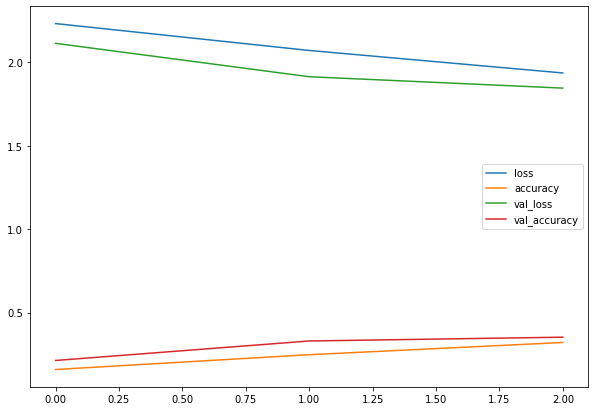

In [21]:
pd.DataFrame(history3.history).plot(figsize=(10, 7))

In [22]:
cnn_model3.save("save_cnn_model3.h5")